<a href="https://colab.research.google.com/github/vincent0426/ITTM/blob/main/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import torch
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# df = pd.read_csv("./drive/MyDrive/Colab Notebooks/文字探勘/MBTI 500.csv")
# display(df.head())
# print(df['type'].value_counts())

In [ ]:
# posts = np.array(df['posts'])
# MBTItype = np.array(df['type'])
# print(posts.shape)
# print(MBTItype.shape)

In [ ]:
# df1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/文字探勘/mbti_1.csv')
# df2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/文字探勘/mbti_full_pull.csv')
df1 = pd.read_csv('./drive/MyDrive/111-1ITTM/mbti_1.csv')
df2 = pd.read_csv('./drive/MyDrive/111-1ITTM/mbti_full_pull.csv')
df1 = df1[['posts','type']]
display(df1.head())
df2.drop(['author_flair_text'], axis=1, inplace=True)
df2 = df2.rename(columns={"body": "posts", "subreddit": "type"})
df2['type'] = df2['type'].str.upper()
display(df2.head())

,posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ


,posts,type
0,Knowing you're in INTJ is a tool for you to us...,INTJ
1,You are truly an enlightened mastermind.,INTJ
2,You should :) it will help if you have a down ...,INFJ
3,I watch a bit of everything (including hentai)...,INTP
4,I don't know if I would count this as a pet pe...,INTJ


In [ ]:
print("df1")
labelcountlist = []
for x in df1.columns:
    labelcountlist.append((len(df1[x].unique())))
labelcount = pd.DataFrame({'Attribute': df1.columns, 'Count': labelcountlist})
print(labelcount)

In [ ]:
typelist = df1["type"].unique()
typelist

In [ ]:
print("df2")
labelcountlist = []
for x in df2.columns:
    labelcountlist.append((len(df2[x].unique())))
labelcount = pd.DataFrame({'Attribute': df2.columns, 'Count': labelcountlist})
print(labelcount)

In [ ]:
np.array(df2)[0][0]

In [ ]:
array_df1 = np.array(df1)
array_df2 = np.array(df2)

array_df2 =  np.array([row for i, row in enumerate(np.array(df2)) if row[1] in typelist])
print(array_df1.shape)
print(array_df2.shape)

In [ ]:
#ESFJ , ESTJ missing
np.unique(array_df2[:,1])

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFP', 'ESTP', 'INFJ', 'INFP',
       'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], dtype=object)

In [ ]:
# posts = np.concatenate((array_df1[:,0], array_df2[:,0]), axis=0)
posts = array_df1[:,0]
# MBTItype = np.concatenate((array_df1[:,1], array_df2[:,1]), axis=0)
MBTItype = array_df1[:,1]
print(len(posts))
print(len(MBTItype))

8675
8675


In [ ]:
# 清除nan type很奇怪的資料
badlist = []
for i, p in enumerate(posts):
  if p != p or MBTItype[i] not in typelist:
    badlist.append(i)
posts = np.delete(posts, badlist)
MBTItype = np.delete(MBTItype, badlist)
print(len(badlist))
print(len(posts))
print(len(MBTItype))
count_l = []
for t in typelist:
  count = MBTItype.tolist().count(t)
  count_l.append(count)
  print(f"{t} : {count}")

0
8675
8675
INFJ : 1470
ENTP : 685
INTP : 1304
INTJ : 1091
ENTJ : 231
ENFJ : 190
INFP : 1832
ENFP : 675
ISFP : 271
ISTP : 337
ISFJ : 166
ISTJ : 205
ESTP : 89
ESFP : 48
ESTJ : 39
ESFJ : 42


In [ ]:
len(count_l)

16

In [ ]:
len(typelist)

16

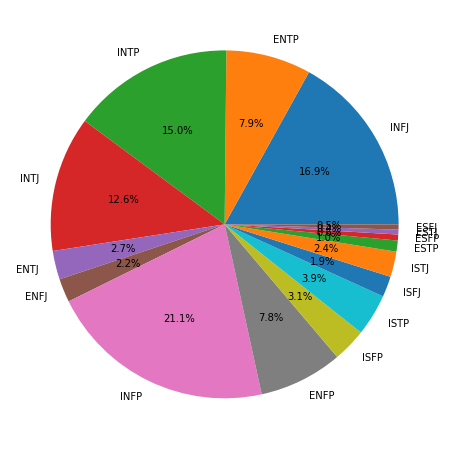

In [ ]:
from matplotlib import pyplot as plt
labels = typelist
 
data = count_l

# Creating plot
plt.figure(figsize = (8, 8))
plt.pie(data, labels = labels, autopct='%1.1f%%')

# show plot
plt.show()

In [ ]:
posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
import string
import re

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = [i for i in words if not "http" in i]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words
clean_posts = [clean_text(x) for x in posts]
clean_posts[0]

'enfp  and  intj  moments  sportscenter  not  top  ten  plays  pranks  what  has  been  the  most  lifechanging  experience  in  your  life  on  repeat  for  most  of  today  may  the  perc  experience  immerse  you  the  last  thing  my  infj  friend  posted  on  his  facebook  before  committing  suicide  the  next  day  rest  in  peace  hello  enfj7  sorry  to  hear  of  your  distress  its  only  natural  for  a  relationship  to  not  be  perfection  all  the  time  in  every  moment  of  existence  try  to  figure  the  hard  times  as  times  of  growth  as  84389  84390    welcome  and  stuff  game  set  match  prozac  wellbrutin  at  least  thirty  minutes  of  moving  your  legs  and  i  dont  mean  moving  them  while  sitting  in  your  same  desk  chair  weed  in  moderation  maybe  try  edibles  as  a  healthier  alternative  basically  come  up  with  three  items  youve  determined  that  each  type  or  whichever  types  you  want  to  do  would  more  than  likely  us

In [ ]:
stop_punc = [",", ";", "."]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(max_features=5000, lowercase = True, stop_words = 'english', token_pattern = '[a-z]+\w*')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

docs_set = []
for i in range(len(clean_posts)):
    if i%1000 == 0:
        print(i)
    print(f"Processing file {i}...")
    lines = clean_posts[i]
    tokens_byWordTokenize = word_tokenize(lines)
    tokens_byWordTokenize = [x for x in tokens_byWordTokenize if x not in stop_punc]
    doc_tokens = [lemmatizer.lemmatize(x) for x in tokens_byWordTokenize]
    docs_set.append(" ".join(doc_tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Streaming output truncated to the last 5000 lines.
Processing file 3680...
Processing file 3681...
Processing file 3682...
Processing file 3683...
Processing file 3684...
Processing file 3685...
Processing file 3686...
Processing file 3687...
Processing file 3688...
Processing file 3689...
Processing file 3690...
Processing file 3691...
Processing file 3692...
Processing file 3693...
Processing file 3694...
Processing file 3695...
Processing file 3696...
Processing file 3697...
Processing file 3698...
Processing file 3699...
Processing file 3700...
Processing file 3701...
Processing file 3702...
Processing file 3703...
Processing file 3704...
Processing file 3705...
Processing file 3706...
Processing file 3707...
Processing file 3708...
Processing file 3709...
Processing file 3710...
Processing file 3711...
Processing file 3712...
Processing file 3713...
Processing file 3714...
Processing file 3715...
Processing file 3716...
Processing file 3717...
Processing file 3718...
Processing fi

In [ ]:
# print(docs_set)
TFIDF_vectors = TFIDF_vectorizer.fit_transform(docs_set)
# print(TFIDF_vectorizer.get_feature_names())
# print(TFIDF_vectors.toarray().shape)

In [ ]:
print(TFIDF_vectors[0].shape)

(1, 5000)


In [ ]:
torch.save(docs_set, f'clean_TFIDF.pt')

In [ ]:
import statistics as s

def cal_sta(df, target):
    llen = []
    for text in df[target]:
        llen.append(len(text.split()))
    print("mean: ", s.mean(llen))
    print("median: ", s.median(llen))
    print(np.percentile(llen, 25))
    print(np.percentile(llen, 50))
    print(np.percentile(llen, 75))
    print(np.percentile(llen, 95))
    print("max: ", max(llen))
    print("min: ", min(llen))

In [ ]:
df_clean_posts = pd.DataFrame(clean_posts, columns = ['post'])

cal_sta(df_clean_posts, "post")

mean:  1261.4882997118157
median:  1315
1082.0
1315.0
1494.0
1681.0
max:  1929
min:  4


In [ ]:
# dictionary of lists  
dict = {'post': clean_posts}  

postdf = pd.DataFrame(dict) 
# saving the dataframe 
postdf.to_csv('clean_posts.csv') 

In [ ]:
len(postdf)

8675

In [ ]:
display(postdf.head())

,post
0,enfp and intj moments sportscenter not t...
1,im finding the lack of me in these pos...
2,good one of course to which i say i ...
3,dear intp i enjoyed our conversation the...
4,youre fired thats another silly misconcep...



Embeding
---



In [ ]:
torch.cuda.empty_cache()
torch.cuda.device_count()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


0

In [ ]:
def getPooledOutputs(model, encoded_dataset, target, batch_size = 1, ):
    # model = model.to(torch.device('cuda'))
    model = model
    if target == "embeddings":
        pooled_outputs = torch.empty([0,768])
    elif target == "second_to_last_hidden":
        pooled_outputs = torch.empty([0,1536])
    elif target == "last_hidden":
        pooled_outputs = torch.empty([0,768])
    elif target == "weighted_sum_last_four_hidden":
        pooled_outputs = torch.empty([0,768])
    elif target == "concat_last_four_hidden":
        pooled_outputs = torch.empty([0,3072])
    elif target == "weighted_sum_all_12_layers":
        pooled_outputs = torch.empty([0,768])
    # pooled_outputs = torch.empty([0,3072])
    print("total number of iters ", len(encoded_dataset['input_ids']))
    
    for i in range(len(encoded_dataset['input_ids'])):
      if(i%1000 == 0):
        print(i)
      size = encoded_dataset['input_ids'].shape[1]
      input_ids = torch.LongTensor(encoded_dataset['input_ids'][i].reshape(1, size))
      attention_mask = torch.LongTensor(encoded_dataset['attention_mask'][i].reshape(1, size))

      with torch.no_grad():
        embeddings = model.forward(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)

        hidden_states = embeddings["hidden_states"]
        if target == "embeddings":
            pooled_output = torch.cat(tuple([hidden_states[i] for i in [0]]), dim=-1)
        elif target == "second_to_last_hidden":
            pooled_output = torch.cat(tuple([hidden_states[i] for i in [-2, -1]]), dim=-1)
        elif target == "last_hidden":
            pooled_output = torch.cat(tuple([hidden_states[i] for i in [-1]]), dim=-1)
        elif target == "weighted_sum_last_four_hidden":
            pooled_output = torch.stack(hidden_states[-4:]).sum(0)
        elif target == "concat_last_four_hidden":
            pooled_output = torch.cat(tuple([hidden_states[i] for i in [-4, -3, -2, -1]]), dim=-1)
        elif target == "weighted_sum_all_12_layers":
            pooled_output = torch.stack(hidden_states[:]).sum(0)
        # get CLS
        pooled_output = pooled_output[:, 0, :]
        # add new pooled output
        pooled_outputs = torch.cat([pooled_outputs, pooled_output],0)
        if i == 0 or i == 1:
            print(pooled_outputs)
        torch.cuda.empty_cache()

    return pooled_outputs

In [ ]:
!pip install transformers
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

# model = model.to(torch.device('cuda'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 26.6 MB/s 
     |████████████████████████████████| 7.6 MB 40.5 MB/s 
     |████████████████████████████████| 182 kB 68.4 MB/s 


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
new_clean_posts = pd.read_csv('./drive/MyDrive/111-1ITTM/new_clean_posts.csv')
new_clean_posts

,Unnamed: 0,Unnamed: 0.1,post,type
0,0,0,enfp and intj moments sportscenter not t...,INFJ
1,1,1,im finding the lack of me in these pos...,ENTP
2,2,2,good one of course to which i say i ...,INTP
3,3,3,dear intp i enjoyed our conversation the...,INTJ
4,4,4,youre fired thats another silly misconcep...,ENTJ
...,...,...,...,...
95598,95600,95600,aangs control of the avatar state increa...,INTJ
95599,95601,95601,once again sorry for the delayed respons...,INTP
95600,95602,95602,not for your own sake but for hers wer...,INTJ
95601,95603,95603,just because your life isnt amazing righ...,INFP


In [ ]:
start = 0
end = 100
temp = new_clean_posts["post"]

encoded_text = tokenizer.batch_encode_plus(
    temp,
    max_length=512,
    add_special_tokens=True,
    padding=True,
    truncation=True,
    return_tensors='pt',
    return_attention_mask=True,
)
encoded_text = encoded_text
torch.save(encoded_text, f'./drive/MyDrive/111-1ITTM/new_clean_posts_encoded_text.pt')

In [ ]:
encoded_text = torch.load('./drive/MyDrive/111-1ITTM/new_clean_posts_encoded_text.pt')

In [ ]:
len(encoded_text["input_ids"])

95603

In [ ]:
embeddings_output = getPooledOutputs(model, encoded_text, "last_hidden")
torch.save(embeddings_output, f'./drive/MyDrive/111-1ITTM/last_hidden_90000_output.pt')

total number of iters  95603
0
tensor([[ 7.9401e-02, -3.8821e-02,  2.1824e-01,  3.3152e-01, -4.5244e-01,
         -2.4976e-01,  9.6273e-02,  5.7196e-01,  1.7558e-01, -6.9034e-01,
          3.5983e-01, -6.1888e-02, -1.6548e-01, -1.8656e-01,  2.1213e-01,
          2.1344e-01,  2.2887e-01,  7.4134e-01,  7.9667e-02,  3.3341e-01,
          8.5130e-02, -5.0443e-01,  3.0897e-01, -6.1259e-02,  4.0807e-01,
         -2.4676e-01, -1.0816e-01, -3.2441e-01,  1.0845e-01, -1.1430e-01,
          1.0554e-01,  2.1204e-01,  1.4061e-01, -3.3915e-01,  3.7105e-01,
         -4.7036e-01,  1.7250e-01, -2.6061e-01,  5.4757e-01,  1.2838e-01,
         -2.5770e-01,  3.0843e-01, -1.9172e-01, -2.3001e-01,  9.6338e-02,
          4.3268e-01, -3.9709e+00,  7.3667e-02,  8.3574e-02, -3.6969e-01,
          2.7942e-01, -8.5561e-01,  1.4260e-02,  3.3190e-01,  1.8219e-01,
          4.4535e-01, -1.8598e-01,  1.8966e-01,  8.9717e-02, -7.6843e-02,
          4.3532e-01, -4.8071e-02, -3.0622e-01,  1.6781e-01,  2.6873e-02,
       

In [ ]:
encoded_text = torch.load('./drive/MyDrive/111-1ITTM/encoded_text_8675.pt')

In [ ]:
len(encoded_text["input_ids"])

2

In [ ]:
print(len(encoded_text["input_ids"]))
print(len(encoded_text["input_ids"][0]))

8675
512


In [ ]:
# embeddings_output = getPooledOutputs(model, encoded_text, "embeddings")
# torch.save(embeddings_output, f'./drive/MyDrive/111-1ITTM/embeddings_output.pt')

In [ ]:
# second_to_last_hidden_output = getPooledOutputs(model, encoded_text, "second_to_last_hidden")
# torch.save(second_to_last_hidden_output, f'./drive/MyDrive/111-1ITTM/second_to_last_hidden_output.pt')

In [ ]:
# last_hidden_output = getPooledOutputs(model, encoded_text, "last_hidden")
# torch.save(last_hidden_output, f'./drive/MyDrive/111-1ITTM/last_hidden_output.pt')

In [ ]:
# weighted_sum_last_four_hidden_output = getPooledOutputs(model, encoded_text, "weighted_sum_last_four_hidden")
# torch.save(weighted_sum_last_four_hidden_output, f'./drive/MyDrive/111-1ITTM/weighted_sum_last_four_hidden_output.pt')

In [ ]:
concat_last_four_hidden_output = getPooledOutputs(model, encoded_text, "concat_last_four_hidden")
torch.save(concat_last_four_hidden_output, f'./drive/MyDrive/111-1ITTM/concat_last_four_hidden_output.pt')

total number of iters  8675
0
tensor([[ 0.5692, -0.1708, -0.0197,  ..., -0.3148,  0.4700,  0.1711]],
       device='cuda:0')
tensor([[ 0.5692, -0.1708, -0.0197,  ..., -0.3148,  0.4700,  0.1711],
        [ 0.4279, -0.1017, -0.0568,  ..., -0.3958,  0.5792,  0.0729]],
       device='cuda:0')
1000
2000
3000
4000
5000
6000
7000
8000


In [ ]:
encoded_text = torch.load('./drive/MyDrive/111-1ITTM/concat_last_four_hidden_output.pt')
encoded_text.shape

torch.Size([8675, 3072])

In [ ]:
weighted_sum_all_12_layers_output = getPooledOutputs(model, encoded_text, "weighted_sum_all_12_layers")
torch.save(weighted_sum_all_12_layers_output, f'./drive/MyDrive/111-1ITTM/weighted_sum_all_12_layers_output.pt')

RuntimeError: ignored

In [ ]:
print(pooled_output.shape)
pooled_output

torch.Size([8675, 3072])


tensor([[ 0.5692, -0.1708, -0.0197,  ..., -0.3148,  0.4700,  0.1711],
        [ 0.4279, -0.1017, -0.0568,  ..., -0.3958,  0.5792,  0.0729],
        [ 0.3972, -0.1523,  0.0310,  ..., -0.1771,  0.5087, -0.0752],
        ...,
        [ 0.3606, -0.0179, -0.0393,  ..., -0.2860,  0.3548, -0.0088],
        [ 0.5150,  0.0292, -0.2016,  ..., -0.4541,  0.5896, -0.0747],
        [ 0.3752, -0.1424, -0.2326,  ..., -0.3744,  0.5382,  0.1171]],
       device='cuda:0')

## Longformer

In [ ]:
# from transformers import LongformerTokenizer, LongformerModel

# model = LongformerModel.from_pretrained("allenai/longformer-base-4096")
# tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
# longformer_encoded_text = tokenizer.batch_encode_plus(
#     clean_posts,
#     max_length=2000,
#     add_special_tokens=True,
#     padding=True,
#     truncation=True,
#     return_tensors='pt',
#     return_attention_mask=True,
# )

# torch.save(longformer_encoded_text, f'longformer_encoded_text.pt')

In [ ]:
# longformer_encoded_text = encoded_text = torch.load('./drive/MyDrive/111-1ITTM/longformer_encoded_text.pt')

In [ ]:
# pooled_output = getPooledOutputs(model, longformer_encoded_text)
# torch.save(pooled_output, f'longformer_pooled_output.pt')

tensor([], device='cuda:0', size=(0, 3072))
total number of iters  8675
0
LongformerBaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.1106,  0.0309, -0.0547,  ..., -0.2806, -0.1071,  0.0512],
         [ 0.0236, -0.0780,  0.0015,  ..., -0.4027, -0.2663,  0.0161],
         [ 0.0264, -0.0482,  0.0654,  ..., -0.3932, -0.0766,  0.1398],
         ...,
         [-0.0236,  0.0741, -0.0145,  ..., -0.0990, -0.0409, -0.0745],
         [-0.0236,  0.0741, -0.0145,  ..., -0.0990, -0.0409, -0.0745],
         [-0.0236,  0.0741, -0.0145,  ..., -0.0990, -0.0409, -0.0745]]],
       device='cuda:0'), pooler_output=tensor([[ 1.4208e-01, -2.5639e-01,  5.5256e-02, -2.6832e-02,  3.4599e-01,
         -2.1293e-01, -4.9206e-01, -4.3865e-01, -1.3979e-01, -2.2767e-01,
         -3.5059e-01, -8.9891e-02,  2.1802e-01, -2.8827e-01,  7.9106e-02,
         -1.8444e-01, -3.8849e-01, -1.2992e-01, -1.3231e-01, -9.5794e-02,
         -1.4685e-01, -1.7728e-02, -2.6381e-01, -2.4296e-02, -4.3189e-01,
          2.2408e-02

## SVM

In [ ]:
new_clean_posts

,Unnamed: 0,post
0,0,enfp and intj moments sportscenter not t...
1,1,im finding the lack of me in these pos...
2,2,good one of course to which i say i ...
3,3,dear intp i enjoyed our conversation the...
4,4,youre fired thats another silly misconcep...
...,...,...
95600,95600,aangs control of the avatar state increa...
95601,95601,once again sorry for the delayed respons...
95602,95602,not for your own sake but for hers wer...
95603,95603,just because your life isnt amazing righ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(new_clean_posts["post"])
X=vectorizer.transform(new_clean_posts["post"]).toarray()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# df = pd.DataFrame(encoded_text.numpy())
X = X
Y = new_clean_posts["type"].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

Linear_SVM_model = SVC(kernel='linear', C=1, probability=True)
Linear_SVM_model.fit(x_train , y_train)

In [ ]:
predicted_results = []
expected_results = []

expected_results.extend(y_test)
predicted_results.extend(Linear_SVM_model.predict(x_test))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected_results, predicted_results))

              precision    recall  f1-score   support

        ENFJ       0.09      0.19      0.12        16
        ENFP       0.22      0.32      0.26        53
        ENTJ       0.21      0.17      0.19        23
        ENTP       0.28      0.27      0.27        83
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         3
        ESTP       0.12      0.11      0.12         9
        INFJ       0.34      0.43      0.38       148
        INFP       0.44      0.38      0.41       192
        INTJ       0.24      0.22      0.23       107
        INTP       0.37      0.29      0.32       131
        ISFJ       0.08      0.07      0.07        14
        ISFP       0.10      0.12      0.11        25
        ISTJ       0.05      0.04      0.05        24
        ISTP       0.19      0.21      0.20        28

    accuracy                           0.30       868
   macro avg       0.17   

In [ ]:
MBTIdict = {
    "INFJ" : 0,
    "INFP" : 1,
    "INTJ" : 2,
    "INTP" : 3,
    "ISFJ" : 4,
    "ISFP" : 5,
    "ISTJ" : 6,
    "ISTP" : 7,
    "ENFJ" : 8,
    "ENFP" : 9,
    "ENTJ" : 10,
    "ENTP" : 11,
    "ESFJ" : 12,
    "ESFP" : 13,
    "ESTJ" : 14,
    "ESTP" : 15,
}
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(clean_posts)
X=vectorizer.transform(clean_posts).toarray()
Y = [MBTIdict[key] for key in MBTItype]
print(len(X[0]))
print(len(Y))

5000
8675


In [ ]:
print(len(X[0]))

5000


In [ ]:
CONFIG = {
  "seed" : 77777,
  "n_component" : 0.99,
  "n_epochs": 300,
  "batch_size": 128,
  "lr": 5*10**(-4),
  "earlyStop": 20,
  "testRatio" : 0.1,
  "validRatio" : 0.1,
  "last_hidden_MLP_Model" : "./last_hidden_MLP_Model.ckpt",
}

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_rescaled = scaler.fit_transform(X)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=CONFIG["n_component"])
# pca.fit(X_rescaled)
# X_pca = pca.transform(X_rescaled)
# print(X_pca.shape)

(8675, 4521)


In [ ]:
print(docs_set[0])

'http : //www.youtube.com/watch ? v=qsXHcwe3krw|||http : //41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moment http : //www.youtube.com/watch ? v=iz7lE1g4XM4 sportscenter not top ten play http : //www.youtube.com/watch ? v=uCdfze1etec pranks|||What ha been the most life-changing experience in your life ? |||http : //www.youtube.com/watch ? v=vXZeYwwRDw8 http : //www.youtube.com/watch ? v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace~ http : //vimeo.com/22842206|||Hello ENFJ7 Sorry to hear of your distress It 's only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard time a time of growth a ... |||84389 84390 http : //wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http : //assets.dornob.com/wp-content/uploads/2010/04/round-home-design.j

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = TFIDF_vectorizer.transform(docs_set).toarray()
# X_rescaled = scaler.fit_transform(X)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=CONFIG["n_component"])
# pca.fit(X_rescaled)
# X_pca = pca.transform(X_rescaled)
# print(X_pca.shape)

(8675, 4520)


In [ ]:
encoded_text = torch.load('./drive/MyDrive/111-1ITTM/last_hidden_output.pt')
encoded_text.shape

RuntimeError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = TFIDF_vectorizer.transform(docs_set).toarray()
Y = df1["type"].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

Linear_SVM_model = SVC(kernel='linear', C=1, probability=True)
Linear_SVM_model.fit(x_train , y_train)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
predicted_results = []
expected_results = []

expected_results.extend(y_test)
predicted_results.extend(Linear_SVM_model.predict(x_test))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected_results, predicted_results))

              precision    recall  f1-score   support

        ENFJ       0.62      0.53      0.57        34
        ENFP       0.64      0.56      0.60       147
        ENTJ       0.42      0.22      0.29        49
        ENTP       0.70      0.56      0.62       154
        ESFJ       0.75      0.27      0.40        11
        ESFP       0.00      0.00      0.00        11
        ESTJ       1.00      0.17      0.29         6
        ESTP       0.67      0.12      0.21        16
        INFJ       0.66      0.72      0.69       280
        INFP       0.66      0.85      0.75       375
        INTJ       0.72      0.70      0.71       222
        INTP       0.65      0.77      0.70       248
        ISFJ       0.60      0.32      0.42        28
        ISFP       0.55      0.33      0.42        48
        ISTJ       0.88      0.49      0.63        47
        ISTP       0.80      0.66      0.72        59

    accuracy                           0.67      1735
   macro avg       0.65   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
